# Exercise- Dummy variable
At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [43]:
import pandas as pd

import numpy as np

df= pd.read_csv('carprices.csv')

df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


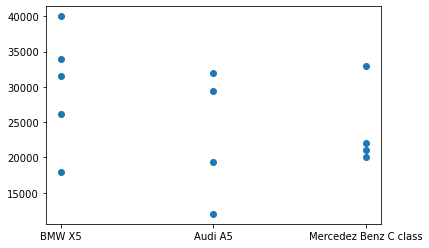

In [44]:
plt.scatter(x=df['Car Model'],y=df['Sell Price($)'])  #,'Mileage','Age(yrs)'

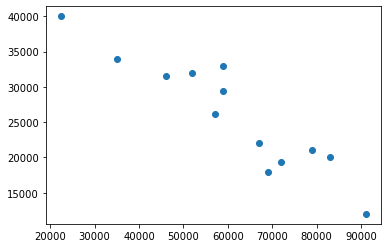

In [45]:
plt.scatter(x=df['Mileage'],y=df['Sell Price($)'])

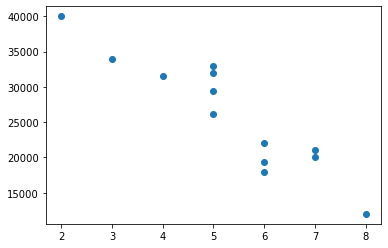

In [46]:
plt.scatter(x=df['Age(yrs)'],y=df['Sell Price($)'])

In [47]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# df['Car Model'] = le.fit_transform(df['Car Model'])

# df['Car Model']

In [61]:
X = df[['Car Model','Mileage','Age(yrs)']].values
X

array([['BMW X5', 69000, 6],
       ['BMW X5', 35000, 3],
       ['BMW X5', 57000, 5],
       ['BMW X5', 22500, 2],
       ['BMW X5', 46000, 4],
       ['Audi A5', 59000, 5],
       ['Audi A5', 52000, 5],
       ['Audi A5', 72000, 6],
       ['Audi A5', 91000, 8],
       ['Mercedez Benz C class', 67000, 6],
       ['Mercedez Benz C class', 83000, 7],
       ['Mercedez Benz C class', 79000, 7],
       ['Mercedez Benz C class', 59000, 5]], dtype=object)

In [62]:
y = df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
ct = ColumnTransformer([("Car Model", OneHotEncoder(),[0])], remainder="passthrough") # The last arg ([0]) is the list of columns you want to transform in this step
X = ct.fit_transform(X)    
X

array([[0.0, 1.0, 0.0, 69000, 6],
       [0.0, 1.0, 0.0, 35000, 3],
       [0.0, 1.0, 0.0, 57000, 5],
       [0.0, 1.0, 0.0, 22500, 2],
       [0.0, 1.0, 0.0, 46000, 4],
       [1.0, 0.0, 0.0, 59000, 5],
       [1.0, 0.0, 0.0, 52000, 5],
       [1.0, 0.0, 0.0, 72000, 6],
       [1.0, 0.0, 0.0, 91000, 8],
       [0.0, 0.0, 1.0, 67000, 6],
       [0.0, 0.0, 1.0, 83000, 7],
       [0.0, 0.0, 1.0, 79000, 7],
       [0.0, 0.0, 1.0, 59000, 5]], dtype=object)

In [64]:
X = X[:,1:]  # to deal with dummy var trap

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X,y)

LinearRegression()

### Question 1
Predict price of a mercedez benz that is 4 yr old with mileage 45000

In [66]:
model.predict([[0,1,45000,4]])

array([36991.31721062])

### Question 2
Predict price of a BMW X5 that is 7 yr old with mileage 86000

In [67]:
model.predict([[1,0,86000,7]])

array([11080.74313219])

### Question 3
Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [68]:
model.score(X,y)

0.9417050937281083

# Exercise

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

* Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
* Plot bar charts showing impact of employee salaries on retention
* Plot bar charts showing corelation between department and employee retention
* Now build logistic regression model using variables that were narrowed down in step 1
* Measure the accuracy of the model

### EDA

In [2]:
# import libraries
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\PRANAV\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Univariate Feature Analysis

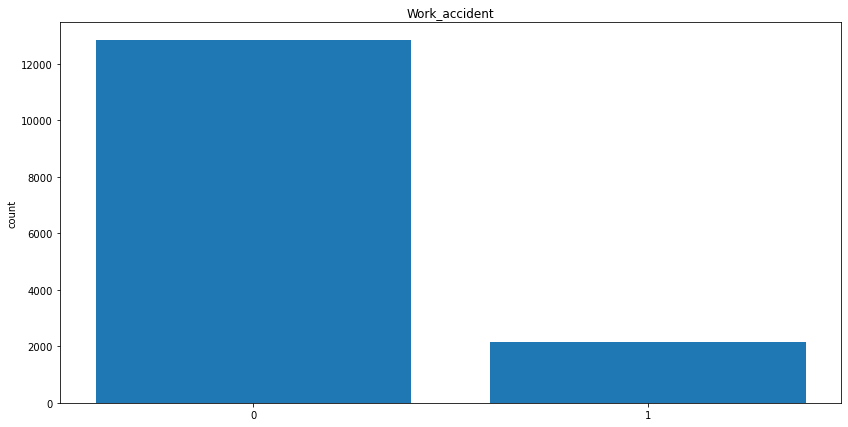

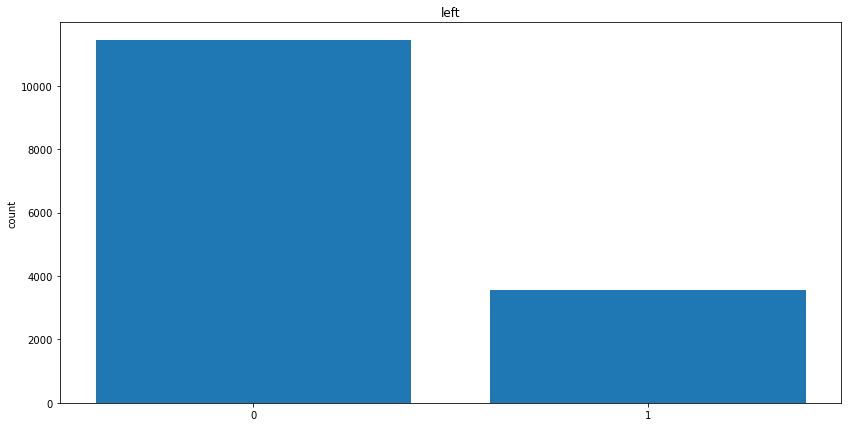

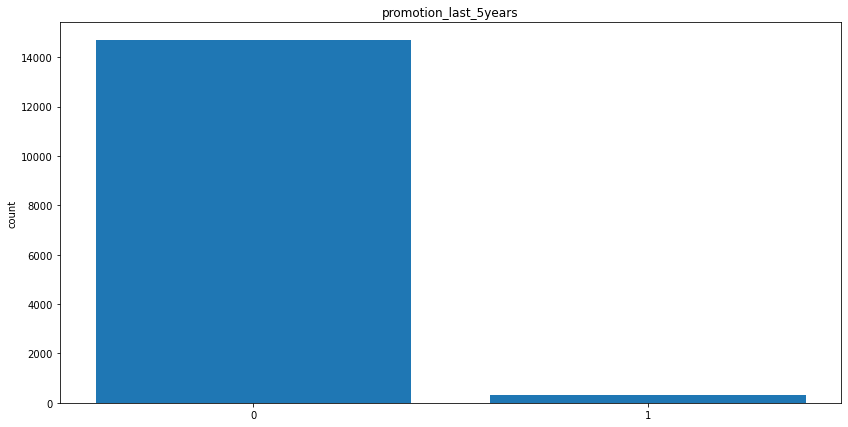

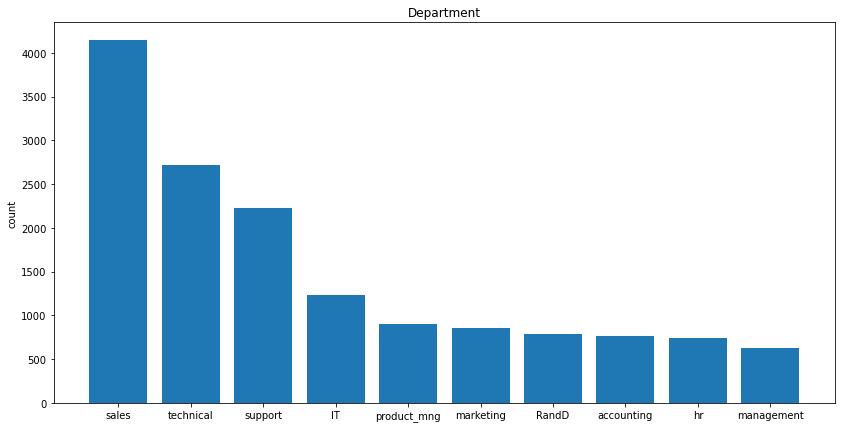

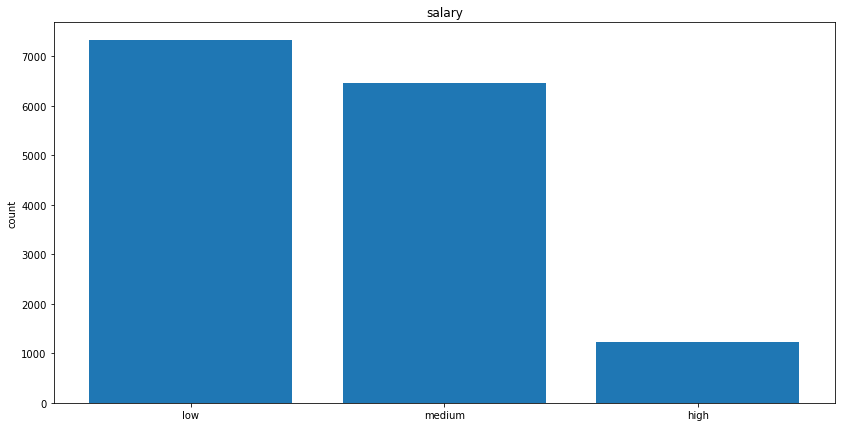

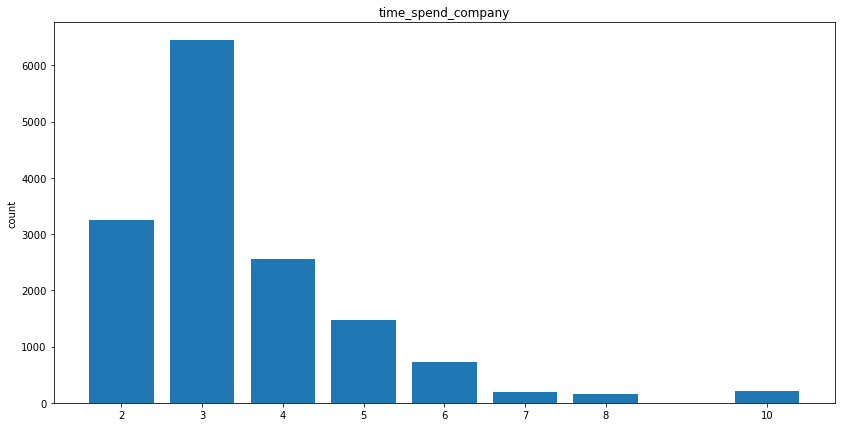

In [5]:
category = ['Work_accident','left','promotion_last_5years','Department','salary','time_spend_company']

def bar_plot(variable):
    val_counts = df[variable].value_counts()
    
    plt.figure(figsize=(14,7))
    plt.bar(val_counts.index,val_counts)
    
    plt.xticks(val_counts.index,val_counts.index.values)
    plt.ylabel('count')
    
    plt.title(variable)
    plt.show()
    
for c in category:
    bar_plot(c)

In [8]:
category2 = ['left','promotion_last_5years']

In [14]:
df[['left','time_spend_company']].groupby(['left'], as_index=False).mean()

,left,time_spend_company
0,0,3.380032
1,1,3.876505


In [15]:


df[['left','Department']].groupby(['Department'], as_index=False).mean().sort_values(by='left', ascending=False)

,Department,left
3,hr,0.290934
2,accounting,0.265971
9,technical,0.256250
8,support,0.248991
7,sales,0.244928
5,marketing,0.236597
0,IT,0.222494
6,product_mng,0.219512
1,RandD,0.153748
4,management,0.144444



### ->More number of employees are left from hr department.


In [16]:
df[['promotion_last_5years','Department']].groupby(['Department'], as_index=False).mean().sort_values(by='promotion_last_5years',ascending=False)

,Department,promotion_last_5years
4,management,0.109524
5,marketing,0.050117
1,RandD,0.034307
7,sales,0.024155
3,hr,0.020298
2,accounting,0.018253
9,technical,0.010294
8,support,0.008973
0,IT,0.002445
6,product_mng,0.000000



### ->Promotion is done more in the Management department


In [17]:
numerical = ['average_montly_hours','satisfaction_level']

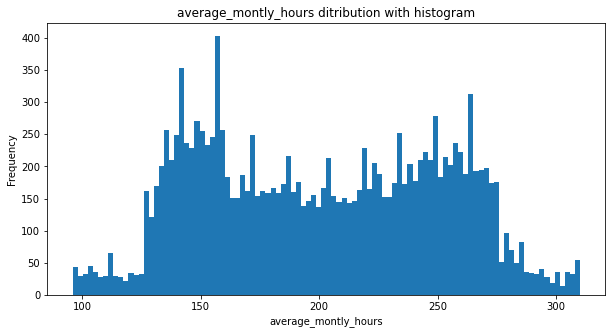

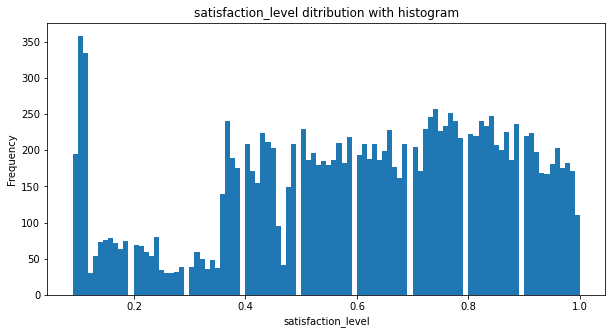

In [18]:
def plot_hist(numerical_var):
    plt.figure(figsize=(10,5))
    plt.hist(df[numerical_var],bins=100)
    plt.xlabel(numerical_var)
    plt.ylabel('Frequency')
    plt.title('{} ditribution with histogram'.format(numerical_var))
    
for n in numerical:
    plot_hist(n)

### Basic data Analysis

In [19]:
left = df[df['left']==1]
left.shape

(3571, 10)

In [20]:
retained = df[df['left']==0]
retained.shape

(11428, 10)

In [48]:
df.groupby('left', as_index= False).mean()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### <span style='color:green'>-> Employees tend to leave when satisfaction_level is low</span>
###  <span style='color:green'>-> Employees tend to leave when average_montly_hours is high</span>
###  <span style='color:green'>-> Employee tend to leave when promotion oppportunity is low</span>

## Impact of salary

<AxesSubplot:xlabel='salary'>

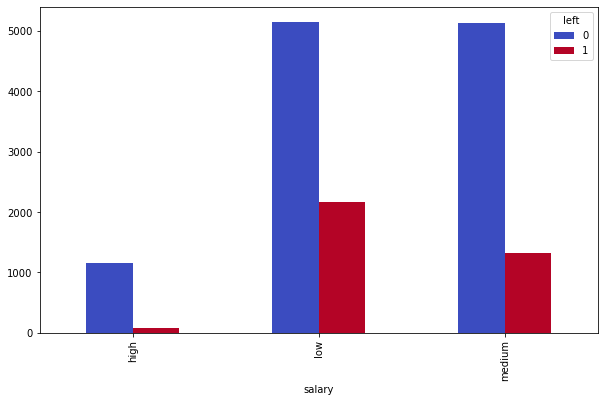

In [22]:
pd.crosstab(df.salary,df.left).plot(kind='bar', figsize=(10,6), colormap='coolwarm')

### <span style='color:green'>-> Salary impacts employee retention rate</span>

## Correlation between Department and employee retention

<AxesSubplot:xlabel='Department'>

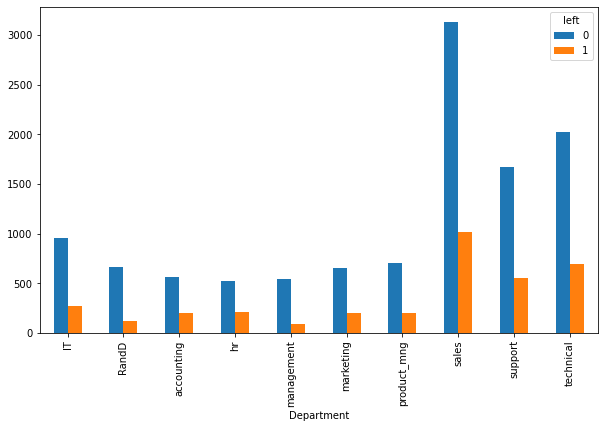

In [23]:
pd.crosstab(df.Department,df.left).plot(kind='bar', figsize=(10,6))

### -> There is not a little impact of Department in employee retention rate

### Logistic regression

In [39]:
lr = LogisticRegression()

X = df[['salary','satisfaction_level','average_montly_hours','promotion_last_5years','time_spend_company']]

y = df.left

In [40]:
X

,salary,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company
0,low,0.38,157,0,3
1,medium,0.80,262,0,6
2,medium,0.11,272,0,4
3,low,0.72,223,0,5
4,low,0.37,159,0,3
...,...,...,...,...,...
14994,low,0.40,151,0,3
14995,low,0.37,160,0,3
14996,low,0.37,143,0,3
14997,low,0.11,280,0,4


In [41]:
dummies = pd.get_dummies(df[['salary']], drop_first=True)

In [42]:
dummies

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [43]:
X = pd.concat([X.drop(columns=['salary']),dummies], axis='columns')
X

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,salary_low,salary_medium
0,0.38,157,0,3,1,0
1,0.80,262,0,6,0,1
2,0.11,272,0,4,0,1
3,0.72,223,0,5,1,0
4,0.37,159,0,3,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,3,1,0
14995,0.37,160,0,3,1,0
14996,0.37,143,0,3,1,0
14997,0.11,280,0,4,1,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)

In [45]:
lr.fit(X_train, y_train)

LogisticRegression()

In [46]:
lr.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [47]:
lr.score(X_test,y_test)

0.7748571428571429

# Exercise Naive Bayes

Use wine dataset from sklearn.datasets to classify wines into 3 categories. Load the dataset and split it into test and train. After that train the model using Gaussian and Multinominal classifier and post which model performs better. Use the trained model to perform some predictions on test data.

In [10]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [16]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [17]:
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()

dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['class'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [11]:
inputs = df.drop(['class'], axis='columns')

In [14]:
target = df['class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [18]:
model1 = GaussianNB()
model1.fit(X_train, y_train)

model1.score(X_test,y_test)

0.9722222222222222

In [19]:
model2 = MultinomialNB()
model2.fit(X_train, y_train)

model2.score(X_test, y_test)

0.9166666666666666

In [20]:
model1.predict(X_test[:10])

array([0, 1, 0, 0, 1, 2, 2, 0, 2, 1])

In [21]:
y_test[:10]

15     0
99     1
4      0
12     0
98     1
135    2
149    2
10     0
144    2
76     1
Name: class, dtype: int32